In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
import os
import PIL
import PIL.Image
import tensorflow as tf
import glob
import pathlib
from pathlib import Path

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.optimizers import Adam, SGD

In [42]:
# Define path to the data directory
# chest_xray has a folder of path_xray inside
data_dir = Path('chest_xray/chest_xray')

# path to train data
train_dir = data_dir / 'train'

# path to val data
val_dir = data_dir / 'val'

# path to test data
test_dir = data_dir / 'test'

In [44]:
# directory split again based on target class
normal_cases_dir = train_dir / 'NORMAL'
pneumonia_cases_dir = train_dir / 'PNEUMONIA'

# Get the list of all the images based on them all being jpegs
normal_cases = normal_cases_dir.glob('*.jpeg')
pneumonia_cases = pneumonia_cases_dir.glob('*.jpeg')

train_data = []

# getting all negative class images and adding label
for img in normal_cases:
    train_data.append((img,0))

# getting all positive class images and adding label
for img in pneumonia_cases:
    train_data.append((img, 1))

# creating dataframe for use late 
train_data = pd.DataFrame(train_data, columns=['image', 'label'],index=None)

# shuffle data so that it isnt all 0's then all 1's
train_data = train_data.sample(frac=1.).reset_index(drop=True)
train_data.head()

,image,label
0,chest_xray/chest_xray/train/PNEUMONIA/person14...,1
1,chest_xray/chest_xray/train/PNEUMONIA/person17...,1
2,chest_xray/chest_xray/train/PNEUMONIA/person14...,1
3,chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-...,0
4,chest_xray/chest_xray/train/NORMAL/IM-0689-000...,0


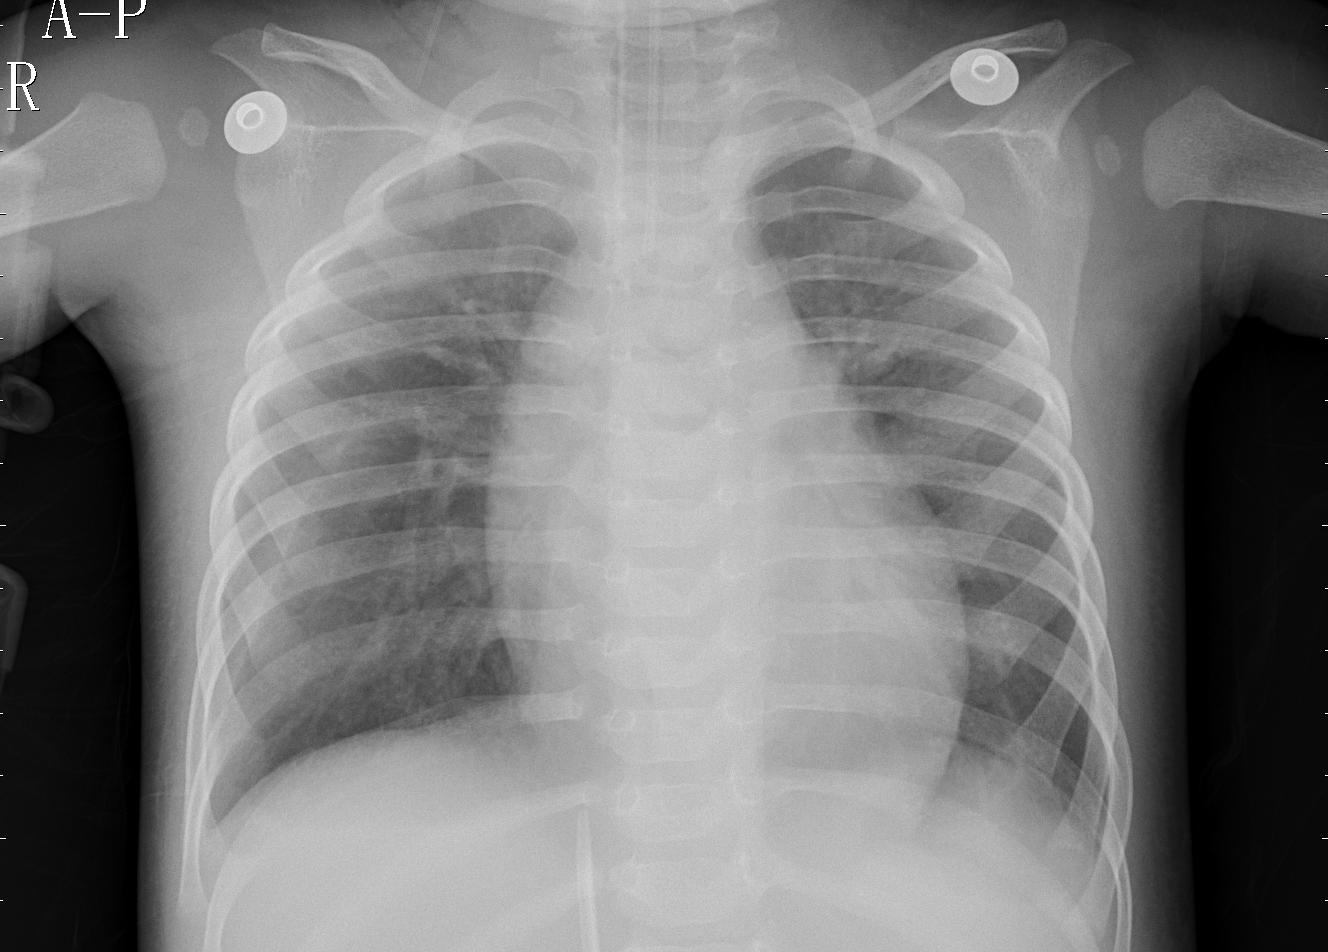

In [50]:
PIL.Image.open(str(train_data.loc[0]['image']))